In [1]:
import pandas as pd
from datetime import date
import numpy as np

In [2]:
# if ModuleNotFoundError: No module named 'holidays'
# uncomment next line and run it once

# ! pip install holidays

In [2]:
import holidays

In [3]:
from datetime import timedelta

In [4]:
file_name = "result_carrental_outsipp.csv"  # sample dataset

In [5]:
data = pd.read_csv(file_name)

In [6]:
data["PICKUP_DATE"] = data["PICKUP_DATE"] .astype('datetime64[ns]')
data["COLLECT_DATE"] = data["COLLECT_DATE"] .astype('datetime64[ns]')

In [7]:
data

,COLLECT_DATE,PICKUP_DATE,OUTSIPP,LOR,AVG_FARE,MIN_FARE,MAX_FARE,MEDIAN_FARE
0,2017-12-31,2018-01-01,CCAR,5,36.48,18.245000,185.240000,26.187500
1,2017-12-31,2018-01-01,ECAR,5,36.74,18.245000,195.120000,26.147500
2,2017-12-31,2018-01-01,EXAR,5,30.66,25.668889,52.440000,28.990625
3,2017-12-31,2018-01-01,FCAR,5,39.91,19.626667,195.700000,30.105000
4,2017-12-31,2018-01-01,FFAR,5,73.83,39.640000,259.190000,54.798333
...,...,...,...,...,...,...,...,...
3772102,2020-01-01,2020-01-25,XXAR,30,26.66,26.660333,26.660333,26.660333
3772103,2020-01-01,2020-01-26,XXAR,30,26.66,26.660333,26.660333,26.660333
3772104,2020-01-01,2020-01-27,XXAR,30,26.66,26.660333,26.660333,26.660333
3772105,2020-01-01,2020-01-28,XXAR,30,26.66,26.660333,26.660333,26.660333


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772107 entries, 0 to 3772106
Data columns (total 8 columns):
COLLECT_DATE    datetime64[ns]
PICKUP_DATE     datetime64[ns]
OUTSIPP         object
LOR             int64
AVG_FARE        float64
MIN_FARE        float64
MAX_FARE        float64
MEDIAN_FARE     float64
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 230.2+ MB


In [10]:
data["TIME BEFORE RENTAL"] = ((data["PICKUP_DATE"] - data["COLLECT_DATE"])/ np.timedelta64(1, 'D')).astype(int)

In [11]:
new_data2 = data[data["TIME BEFORE RENTAL"] == 30]

In [28]:
new_data2 = new_data2.reset_index().drop(columns=['index'])

In [13]:
us_holidays = holidays.CountryHoliday('US', prov=None, state='CA')

In [10]:
# for ptr in holidays.US(years = 2020, state='CA').items(): 
#     print(ptr)

In [29]:
new_data2["HOLIDAY"] = [int(x in us_holidays) for x in new_data2["PICKUP_DATE"]]

In [30]:
# whether pick up date is one day before/after the public holiday
# one day before
# one day after
new_data2["HOLIDAY BEFORE"] = [int(x + timedelta(days=1) in us_holidays) for x in new_data2["PICKUP_DATE"]]
new_data2["HOLIDAY AFTER"] = [int(x - timedelta(days=1) in us_holidays) for x in new_data2["PICKUP_DATE"]]

In [31]:
f = lambda x : 0 if x.weekday() <5  else  1
new_data2["WEEKEND"] = [f(x)for x in new_data2["PICKUP_DATE"]]

In [32]:
new_data2

,COLLECT_DATE,PICKUP_DATE,OUTSIPP,LOR,AVG_FARE,MIN_FARE,MAX_FARE,MEDIAN_FARE,TIME BEFORE RENTAL,HOLIDAY,HOLIDAY BEFORE,HOLIDAY AFTER,WEEKEND
0,2017-12-31,2018-01-30,CCAR,6,45.80,19.772857,105.136000,31.526000,30,0,0,0,0
1,2017-12-31,2018-01-30,CFAR,6,63.96,25.642857,140.095000,43.756000,30,0,0,0,0
2,2017-12-31,2018-01-30,ECAR,6,45.78,19.734286,104.070000,31.727857,30,0,0,0,0
3,2017-12-31,2018-01-30,EXAR,6,50.07,33.375000,78.886667,44.214167,30,0,0,0,0
4,2017-12-31,2018-01-30,FCAR,6,48.40,21.834286,107.856000,35.026000,30,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27688,2019-12-30,2020-01-29,SYMR,30,61.49,61.492000,61.492000,61.492000,30,0,0,0,0
27689,2019-12-30,2020-01-29,UFAR,30,284.68,284.680333,284.680333,284.680333,30,0,0,0,0
27690,2019-12-30,2020-01-29,WCAE,30,170.10,170.095667,170.095667,170.095667,30,0,0,0,0
27691,2019-12-30,2020-01-29,WXAR,30,73.84,73.844667,73.844667,73.844667,30,0,0,0,0


In [34]:
# avg for same car type, N days before
d_sort = new_data2.sort_values(by=['OUTSIPP','PICKUP_DATE'])
car_type = new_data2["OUTSIPP"].unique().tolist()

In [42]:
len(car_type)

60

In [30]:
# # car type for loop %timeit whole data
# for i in range(0,1):
#     %timeit d_sub = d_sort[d_sort["CAR_TYPE"]==car_type[i]] 
#     d_sub = d_sub.reset_index(drop = True)
#     d_sub["AVG_BEFORE_DAYS"] = [d_sub["AVG_FARE"][max(0, i-15):i+1].mean() for i in range(0, len(d_sub["AVG_FARE"]))] 


In [31]:
# d_sub = d_sort[d_sort["CAR_TYPE"]==car_type[1]] 
# d_sub = d_sub.reset_index(drop = True)
# d_sub["AVG_BEFORE_DAYS"] = [d_sub["AVG_FARE"][max(0, i-15):i+1].mean() for i in range(0, len(d_sub["AVG_FARE"]))] 

In [35]:
df_all = pd.DataFrame([], columns=list(d_sort))
for i in range(0,len(car_type)):
    d_sub = d_sort[d_sort["OUTSIPP"]==car_type[i]] 
    d_sub = d_sub.reset_index(drop = True)
    d_sub["AVG_BEFORE_DAYS"] = [d_sub["AVG_FARE"][max(0, i-15):i+1].mean() for i in range(0, len(d_sub["AVG_FARE"]))]
    
    change = [(d_sub["AVG_BEFORE_DAYS"][i] - d_sub["AVG_BEFORE_DAYS"][i-1])/d_sub["AVG_BEFORE_DAYS"][i-1] for i in range(1, len(d_sub["AVG_BEFORE_DAYS"]))]    
    change = [None] + change
    d_sub["CHANGE PERCENT"] = change
    
    df_all = df_all.append(d_sub, ignore_index=True)

D:\Anaconda201910\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [36]:
df_all

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,OUTSIPP,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND
0,45.8000,45.80,NaN,2017-12-31,0,0,0,6,105.136,31.526000,19.772857,CCAR,2018-01-30,30,0
1,43.6550,41.51,-0.0468341,2018-01-01,0,0,0,7,107.610,26.603125,18.355556,CCAR,2018-01-31,30,0
2,44.1000,44.99,0.0101936,2018-01-02,0,0,0,7,127.090,29.499167,16.917778,CCAR,2018-02-01,30,0
3,44.6875,46.45,0.013322,2018-01-03,0,0,0,7,117.990,38.793500,16.917778,CCAR,2018-02-02,30,0
4,45.5900,49.20,0.0201958,2018-01-04,0,0,0,7,130.200,52.325660,18.355556,CCAR,2018-02-03,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27688,108.8200,108.68,-0.000642851,2019-12-16,0,0,0,30,108.679,108.679000,108.679000,ITAR,2020-01-15,30,0
27689,108.7850,108.68,-0.000321632,2019-12-17,0,0,0,30,108.679,108.679000,108.679000,ITAR,2020-01-16,30,0
27690,69.7600,69.76,NaN,2019-11-13,0,0,0,30,69.759,69.759000,69.759000,FJAR,2019-12-13,30,0
27691,69.7600,69.76,0,2019-11-14,0,0,0,30,69.759,69.759000,69.759000,FJAR,2019-12-14,30,1


In [ ]:
# change = [(df_all["AVG_BEFORE_DAYS"][i + 1] - df_all["AVG_BEFORE_DAYS"][i])/df_all["AVG_BEFORE_DAYS"][i] for i in range(0, len(df_all["AVG_BEFORE_DAYS"])-1)] 
# change.append(None)
# df_all["CHANGE PERCENT"] = change

In [43]:
df_all["CHANGE PERCENT"].describe(include='all')

count     27633.0
unique    27343.0
top           0.0
freq        269.0
Name: CHANGE PERCENT, dtype: float64

In [48]:
df_all.median(skipna = True)

AVG_BEFORE_DAYS        81.303750
AVG_FARE               80.940000
CHANGE PERCENT         -0.000184
HOLIDAY                 0.000000
HOLIDAY AFTER           0.000000
HOLIDAY BEFORE          0.000000
LOR                     7.000000
MAX_FARE              138.658000
MEDIAN_FARE            77.517500
MIN_FARE               51.244444
TIME BEFORE RENTAL     30.000000
WEEKEND                 0.000000
dtype: float64

In [47]:
threshold = df_all.median(skipna = True)["CHANGE PERCENT"]

In [66]:
df_all["CHANGE PERCENT"]

0                NaN
1         -0.0468341
2          0.0101936
3           0.013322
4          0.0201958
            ...     
27688   -0.000642851
27689   -0.000321632
27690            NaN
27691              0
27692              0
Name: CHANGE PERCENT, Length: 27693, dtype: object

In [67]:
import matplotlib.pyplot as plt

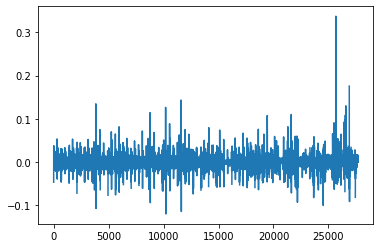

In [68]:
plt.plot(df_all["CHANGE PERCENT"])

In [92]:
(df_all["CHANGE PERCENT"].astype("float")*100).describe()

count    27633.000000
mean        -0.014364
std          1.632651
min        -12.006168
25%         -0.651807
50%         -0.018425
75%          0.544373
max         33.706931
Name: CHANGE PERCENT, dtype: float64

In [97]:
mean = (df_all["CHANGE PERCENT"].astype("float")).describe()["mean"]
std = (df_all["CHANGE PERCENT"].astype("float")).describe()["std"]

In [110]:
t = mean +0.25*std
t

0.003937986463236175

In [111]:
t2 = mean - 0.25*std
t2

-0.004225267388467318

In [49]:
#threshold = df_all["CHANGE PERCENT"].describe()["50%"]

In [113]:
# since threshold is negative, the rule of label is:
    # change > threshold, then "increase"
    # change < 2*threshold, then "decrease"
    # else "no change"
f = lambda x : "Increase" if x > t  else ("Decrease" if x < t2 else "No change")
df["CHANGE"] = [ f(x) for x in df["CHANGE PERCENT"]]

D:\Anaconda201910\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
df

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,OUTSIPP,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND,CHANGE
1,43.6550,41.51,-0.0468341,2018-01-01,0,0,0,7,107.610000,26.603125,18.355556,CCAR,2018-01-31,30,0,Decrease
2,44.1000,44.99,0.0101936,2018-01-02,0,0,0,7,127.090000,29.499167,16.917778,CCAR,2018-02-01,30,0,Increase
3,44.6875,46.45,0.013322,2018-01-03,0,0,0,7,117.990000,38.793500,16.917778,CCAR,2018-02-02,30,0,Increase
4,45.5900,49.20,0.0201958,2018-01-04,0,0,0,7,130.200000,52.325660,18.355556,CCAR,2018-02-03,30,1,Increase
5,46.4950,51.02,0.0198508,2018-01-05,0,0,0,7,161.410000,55.092500,18.355556,CCAR,2018-02-04,30,1,Increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27687,108.8900,108.89,0,2019-08-21,0,0,0,30,108.893333,108.893333,108.893333,ITAR,2019-09-20,30,0,No change
27688,108.8200,108.68,-0.000642851,2019-12-16,0,0,0,30,108.679000,108.679000,108.679000,ITAR,2020-01-15,30,0,No change
27689,108.7850,108.68,-0.000321632,2019-12-17,0,0,0,30,108.679000,108.679000,108.679000,ITAR,2020-01-16,30,0,No change
27691,69.7600,69.76,0,2019-11-14,0,0,0,30,69.759000,69.759000,69.759000,FJAR,2019-12-14,30,1,No change


In [116]:
df.to_csv("car_2018 2019.csv")

In [115]:
df["CHANGE"].value_counts()/len(df)

No change    0.399305
Decrease     0.312163
Increase     0.288532
Name: CHANGE, dtype: float64